"Apple": "AAPL"

In [21]:
import requests
import datetime
import time

In [22]:
b_name = 'AAPL'
key = 'Z5IN9IF1V6QD998E'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol={b_name}&apikey={key}'
r = requests.get(url)
data = r.json()

In [23]:
date = []
close = []
today = datetime.datetime.today().strftime('%Y-%m-%d')
year_ago = (datetime.datetime.strptime(today, '%Y-%m-%d') - datetime.timedelta(days=365)).strftime('%Y-%m-%d')
for k, v in zip(data['Weekly Time Series'].keys(), data['Weekly Time Series'].values()):
    if time.strptime(year_ago, "%Y-%m-%d") < time.strptime(k, "%Y-%m-%d"):
        date.append(k)
        close.append(float(v['4. close']))

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

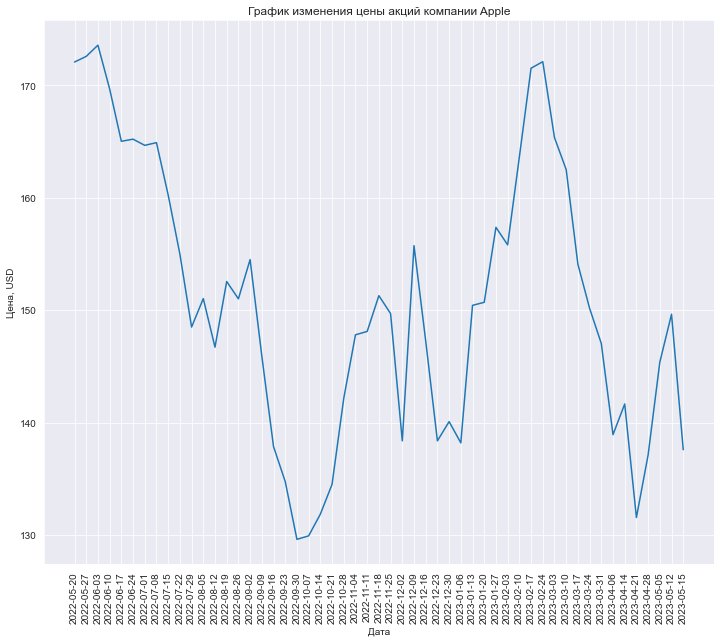

In [25]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (12, 10))
plt.plot(date[::-1], close)
plt.xlabel('Дата')
plt.ylabel('Цена, USD')
plt.title(f'График изменения цены акций компании Apple')
plt.xticks(rotation = 'vertical');
plt.savefig('plot')